<a href="https://colab.research.google.com/github/VIJAYARAGUL362/Pytorch-Multi-Classification-Model-Implementation/blob/main/PYTORCH_MULTICLASS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES (DEPENDENCIES)

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# IMPORTING HELPER FUNCTIONS

In [42]:
import requests

response = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')

with open('helper_function.py',mode="w") as file:
    file.write(response.text)

# IMPORTING THE DATASET

In [2]:
# HYPER PARAMETERS FOR DATASET
NUM_FEATURES = 2
NUM_CLASSES = 4
RANDOM_SEED = 42
NUM_SAMPLES = 1000

In [3]:
from sklearn.datasets import make_blobs
X_blob,y_blob = make_blobs(n_features=NUM_FEATURES,n_samples=NUM_SAMPLES,centers=NUM_CLASSES,random_state=RANDOM_SEED,cluster_std=3)

In [4]:
X_blob

array([[ -7.98846414,   6.54680799],
       [ -4.65334108,  -5.98223185],
       [ -5.20464645,  -6.65209342],
       ...,
       [  1.79168217,   9.87031588],
       [ -8.7081638 ,  -7.4410235 ],
       [-10.52483184,   6.69585729]])

In [5]:
y_blob

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
       1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

# DEVICE AGNOSTIC CODE

In [6]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [7]:
device

'cuda'

In [8]:
y_blob.dtype

dtype('int64')

In [9]:
X_blob.dtype

dtype('float64')

In [10]:
# CONVERTING THE FEATURES AND TARGET TO TENSORS
X_blob =  torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# SPLITTING THE DATASET

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

In [13]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [14]:
y_train.shape,y_test.shape

(torch.Size([800]), torch.Size([200]))

In [15]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

# VISUALIZING THE DATASET

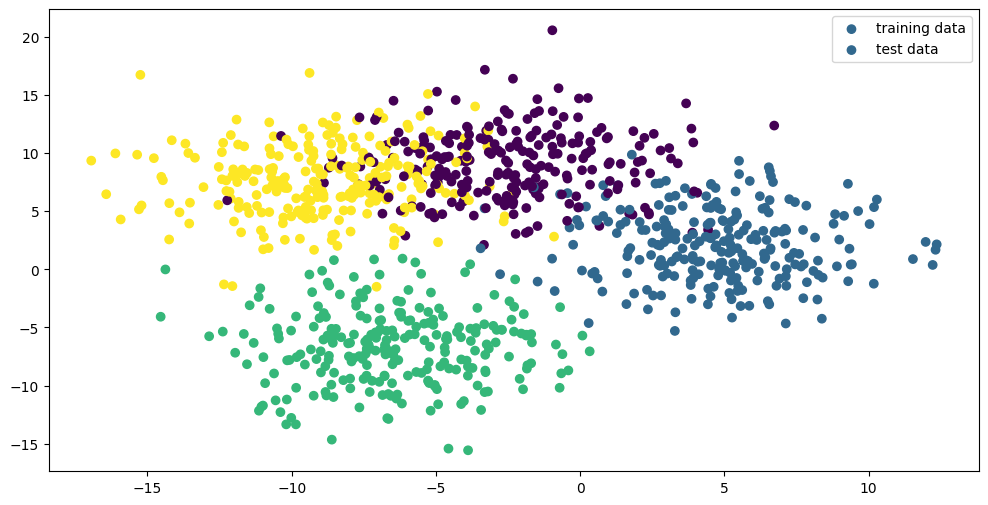

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label="training data")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,label = "test data")
plt.legend()
plt.show()

# MOVING THE DATA TO THE GPU

In [17]:
# TRAINING DATA
X_train = X_train.to(device)
y_train = y_train.to(device)

# TESTING DATA
X_test = X_test.to(device)
y_test = y_test.to(device)

In [18]:
X_train.device

device(type='cuda', index=0)

# BUILDING THE MODEL

## IMPORTING THE LIBRARIES

In [19]:
from torch import nn

## MODEL ARCHITECTURE

In [71]:
class blob_model(nn.Module):
    def __init__ (self,input_feature=2,
                  output_feature=0
                  ,hidden_feature=8):

        """
        Args:
        input_feature (int): number of input units as input
        output_feature (int): number of ouput units needed
        hidden_feature (int): number of hidden unit in hidden layer

        returns:
        a model with Sequqntial Architecture
        """

        super().__init__()

        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_feature,out_features=hidden_feature),
            nn.ReLU(),
            nn.Linear(in_features=hidden_feature,out_features=hidden_feature),
            nn.ReLU(),
            nn.Linear(in_features=hidden_feature,out_features=output_feature),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_stack(x)

In [72]:
# INITIALIZING  A MODEL
blob_model_1 = blob_model(input_feature=2,output_feature=4,hidden_feature=128)

In [73]:
print(blob_model_1)

blob_model(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)


In [74]:
blob_model_1.to(device)

blob_model(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [75]:
from torchsummary import summary

In [76]:
summary(blob_model_1,input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             384
              ReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 128]          16,512
              ReLU-4                  [-1, 128]               0
            Linear-5                    [-1, 4]             516
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


## LOSS FUNCTION AND OPTIMIZER

In [77]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

In [78]:
# loss function
loss_fn = CrossEntropyLoss()

# optimizer
optimizer = Adam(params=blob_model_1.parameters(),lr=0.01)

LOGITS -> PROBS -> LABELS

In [79]:
# RAW OUPTUT OF THE MODEL
blob_model_1.eval()
with torch.inference_mode():
    y_logits = blob_model_1(X_test)

In [80]:
y_logits[:5]

tensor([[ 0.3222,  0.4134,  0.0667, -0.0714],
        [-0.3273,  1.1419,  0.3597,  0.1163],
        [-1.0951,  0.8873, -0.6086, -0.1670],
        [-0.0681,  0.0574, -0.2547,  0.2024],
        [ 0.4304,  0.8090,  0.1329, -0.4606]], device='cuda:0')

In [81]:
# PROBABILITIES OF EACH CLASS THE MODEL THINKS
y_probs = torch.softmax(y_logits,dim=1)

In [82]:
y_probs.shape

torch.Size([200, 4])

In [83]:
# PROB TO PREDICTION LABELS
y_preds = torch.argmax(y_probs,dim=1)

In [84]:
y_preds

tensor([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
        1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 3, 1, 1], device='cuda:0')

In [85]:
# PREDICTED LABELS
y_preds[:5]

tensor([1, 1, 1, 3, 1], device='cuda:0')

In [86]:
# REAL LABELS
y_test[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [87]:
# EVALUATETING METRICS
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

## TRAINING THE MODEL

In [88]:
torch.manual_seed(42)

epochs = 10
training_loss = []
testing_loss = []


for epoch in range(epochs):
    # TRAINING MODE
    blob_model_1.train()

    # FORWARD PASS
    train_logits = blob_model_1(X_train)
    train_probs = torch.softmax(train_logits,dim=1)
    train_preds = torch.argmax(train_probs,dim=1)

    # LOSS FUNCTION
    train_loss = loss_fn(train_logits,y_train)

    # OPTIM ZERO GRAD
    optimizer.zero_grad()

    # BACK PROPAGATION
    train_loss.backward()

    # OPTIMIZER STEP
    optimizer.step()

    # EVALUATION MODE
    blob_model_1.eval()
    with torch.inference_mode():
        test_logits = blob_model_1(X_test)
        test_probs = torch.softmax(test_logits,dim=1)
        test_preds = torch.argmax(test_probs,dim=1)

        test_loss = loss_fn(test_logits,y_test) # loss for the test set

    if epoch%1 == 0:
        training_loss.append(train_loss)
        testing_loss.append(test_loss)

        test_pred_numpy = np.array(test_preds.cpu())
        train_pred_numpy = np.array(train_preds.cpu())

        print(f"EPOCH {epoch}: The train_loss:{train_loss:.2f},The test loss: {test_loss:.2f},"
        f"train accuracy score: {accuracy_score(y_true=y_train.cpu(),y_pred=train_pred_numpy)},test accuracy score: {accuracy_score(y_true=y_test.cpu(),y_pred=test_pred_numpy)}")


EPOCH 0: The train_loss:1.70,The test loss: 0.39,train accuracy score: 0.12125,test accuracy score: 0.885
EPOCH 1: The train_loss:0.41,The test loss: 0.28,train accuracy score: 0.87125,test accuracy score: 0.875
EPOCH 2: The train_loss:0.36,The test loss: 0.31,train accuracy score: 0.8375,test accuracy score: 0.865
EPOCH 3: The train_loss:0.34,The test loss: 0.30,train accuracy score: 0.85875,test accuracy score: 0.88
EPOCH 4: The train_loss:0.34,The test loss: 0.24,train accuracy score: 0.86,test accuracy score: 0.915
EPOCH 5: The train_loss:0.33,The test loss: 0.24,train accuracy score: 0.87,test accuracy score: 0.915
EPOCH 6: The train_loss:0.34,The test loss: 0.25,train accuracy score: 0.86125,test accuracy score: 0.91
EPOCH 7: The train_loss:0.32,The test loss: 0.28,train accuracy score: 0.87625,test accuracy score: 0.89
EPOCH 8: The train_loss:0.32,The test loss: 0.25,train accuracy score: 0.865,test accuracy score: 0.89
EPOCH 9: The train_loss:0.30,The test loss: 0.23,train accu

## EVALUATING THE MODEL

In [89]:
blob_model_1.eval()
with torch.inference_mode():
    y_pred = torch.softmax(blob_model_1(X_test),dim=1).argmax(dim=1)

In [90]:
# PREDICTION
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 0, 0, 2, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 0, 1, 0,
        0, 3, 1, 3, 0, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 0, 3, 0, 0, 2, 3, 1, 3, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 0, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 3,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 3,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [91]:
# REAL VALUES
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

VISUALIZING THE RESULT

In [92]:
from helper_function import plot_decision_boundary

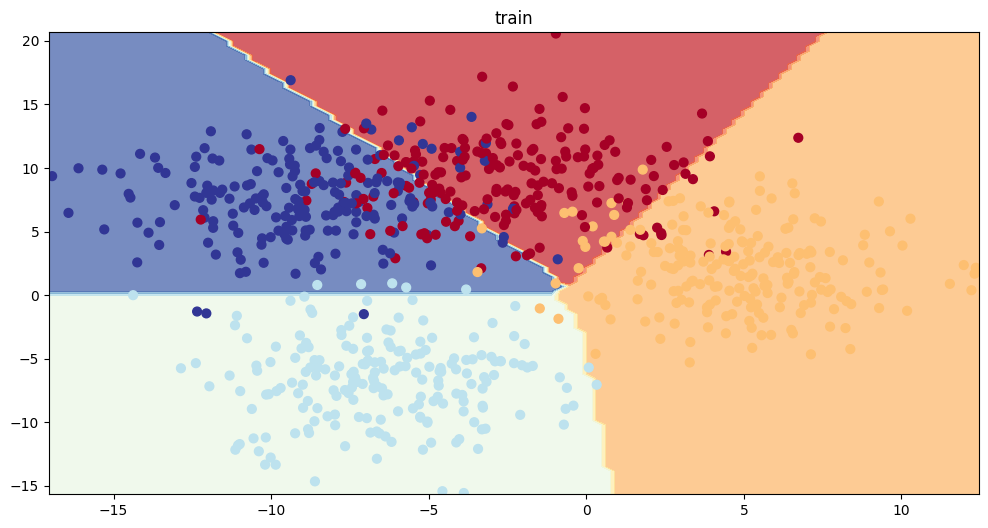

In [93]:
# TRAINING DATA
plt.figure(figsize=(12,6))
plt.title('train')
plot_decision_boundary(model=blob_model_1,X=X_train,y=y_train)

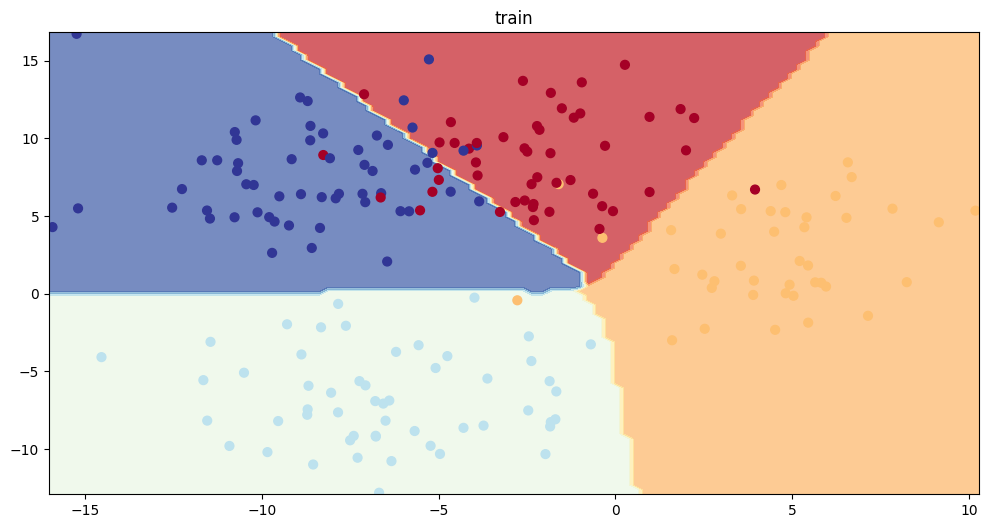

In [94]:
# TESTING DATA
plt.figure(figsize=(12,6))
plt.title('train')
plot_decision_boundary(model=blob_model_1,X=X_test,y=y_test)